# Customer Churn Prediction

### Import libraries 

In [42]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import tensorflow as tf
from keras import layers, models
from keras.callbacks import EarlyStopping
import warnings

### Load dataset from csv

In [4]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')


#print the shape 
df.shape

(7043, 21)

In [5]:
#Print first 5 rows

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
#Print information about the type and null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#Print if have any missing values 
df.isnull().sum()

#result no null values 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
#Print churn distribution
df['Churn'].value_counts()   #binary value = yes and no 

Churn
No     5174
Yes    1869
Name: count, dtype: int64

### Data cleaning

- Drop the unnecessary column
- fillup total charges using median

In [9]:
df = df.drop('customerID', axis=1)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')   #Conver to numeric 

#Null values after converting to total charges 
print("Missing values after converting TotalCharges to numeric: \n")
print(df.isnull().sum())

df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)  #fill up emty values 
#Null values after fill up with median
print("\nMissing values after fill up with median: \n")
print(df.isnull().sum())

Missing values after converting TotalCharges to numeric: 

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Missing values after fill up with median: 

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn

### EDA

- Countplot visualization of Churn

Churn
No     5174
Yes    1869
Name: count, dtype: int64





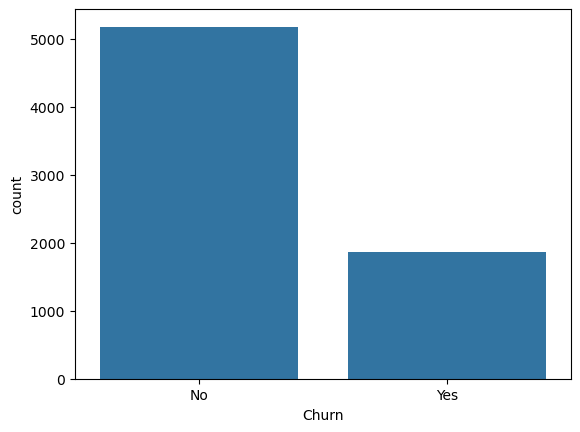

In [10]:
sns.countplot(data=df, x="Churn")  #countplot of Churn

print(df["Churn"].value_counts())
print("\n\n")

----------------------------------------------------------------------------------
- Countplot for all categorical features

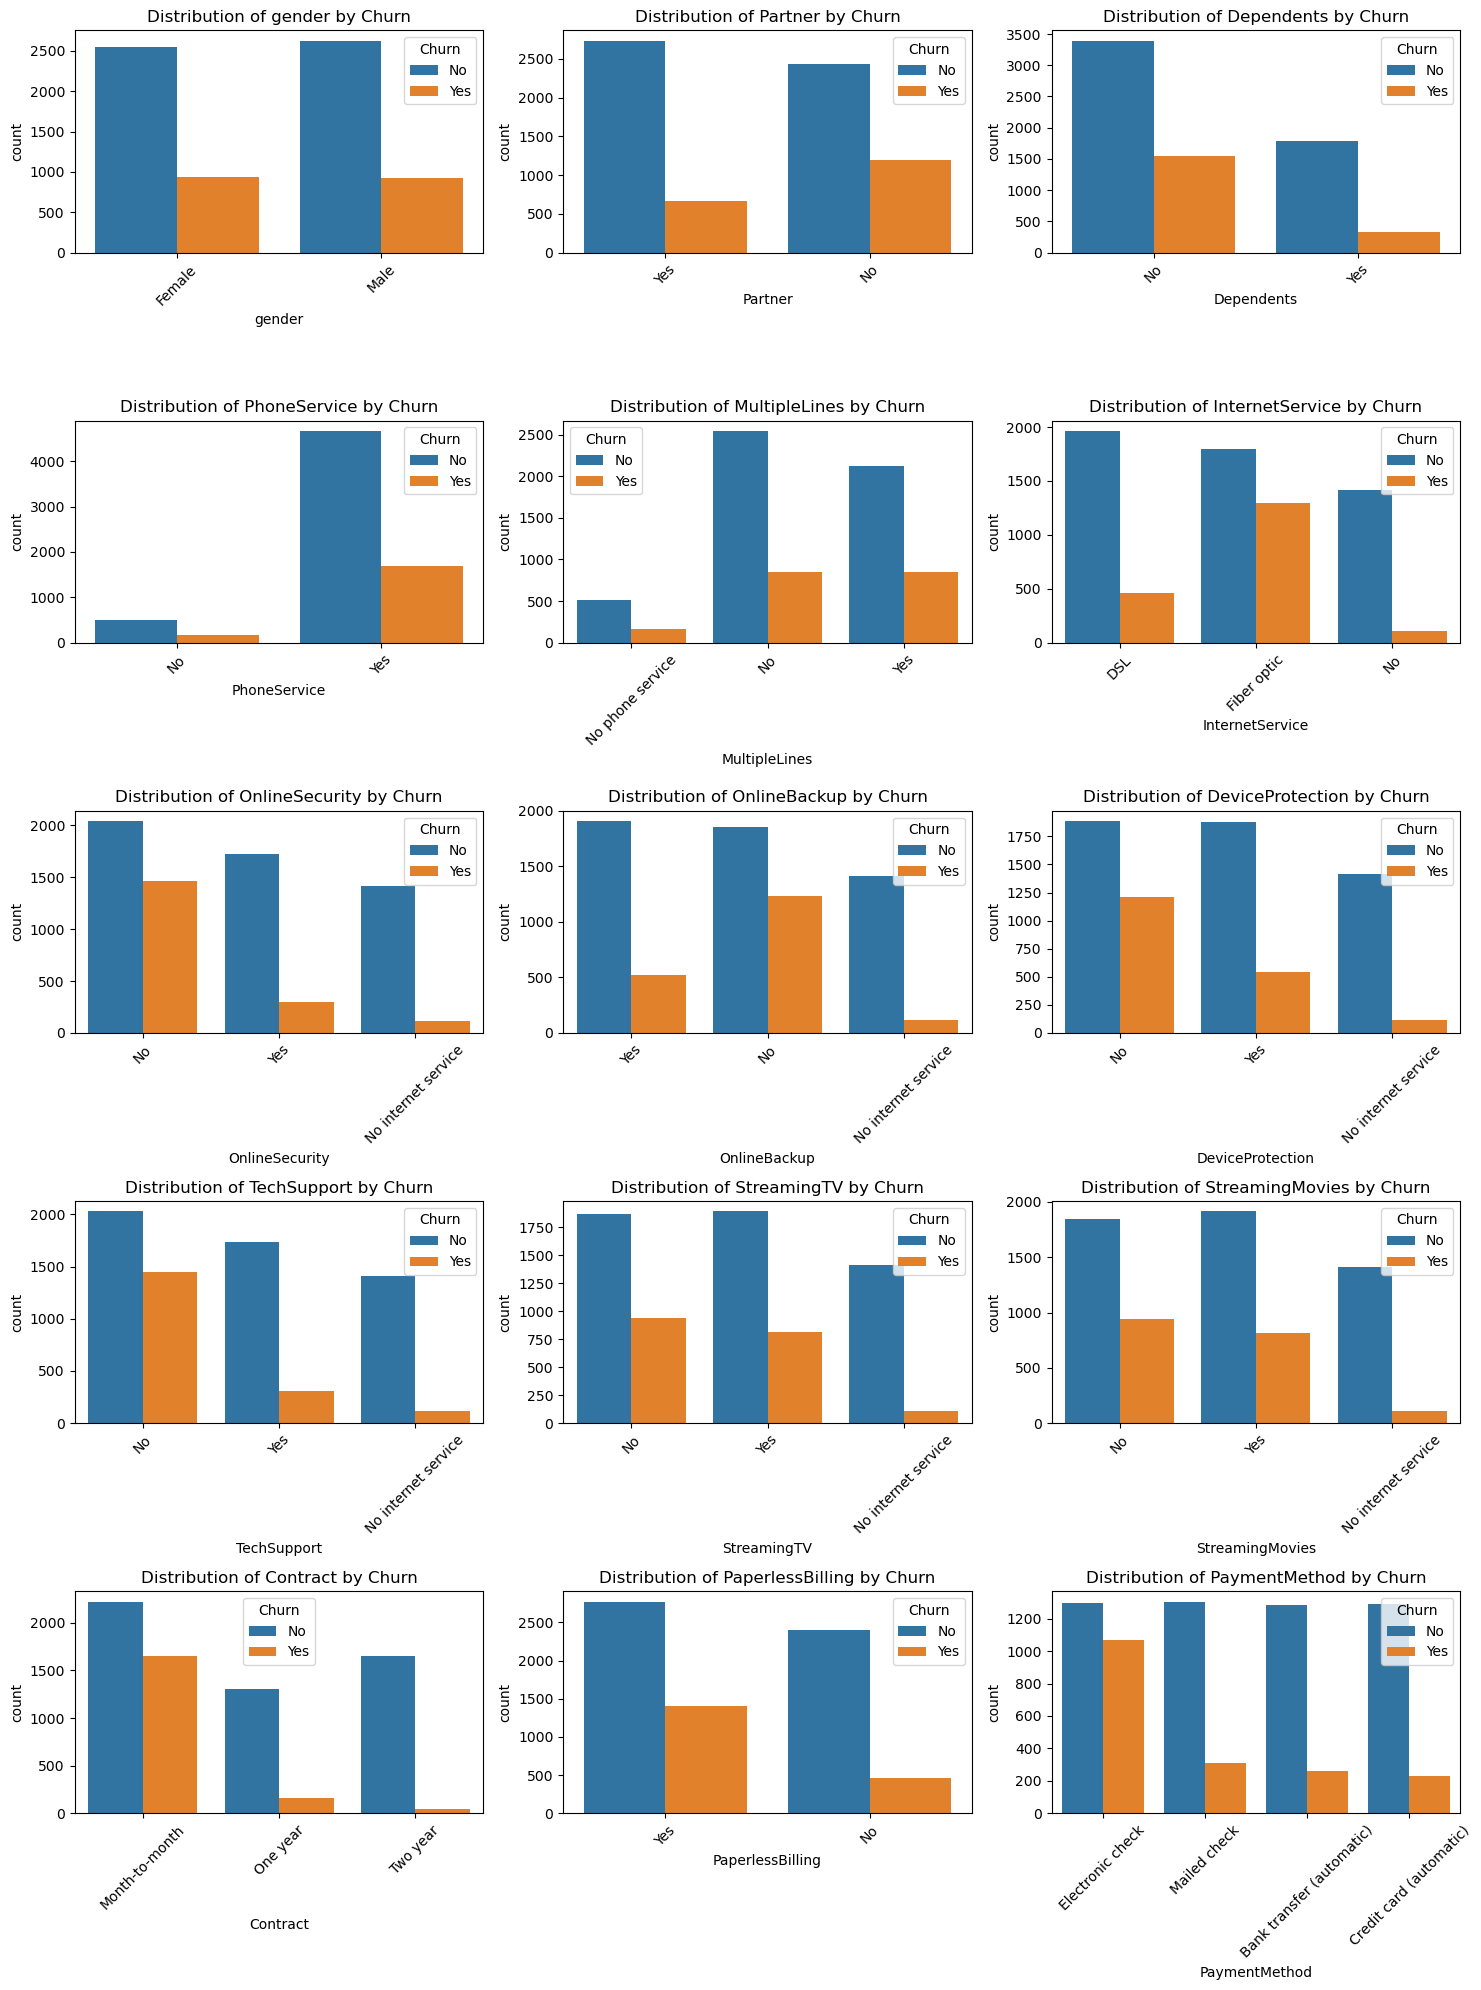

In [11]:
import math 

categorical_cols = df.select_dtypes(include="object").columns.tolist()
categorical_cols.remove('Churn')

cols = 3
rows = math.ceil(len(categorical_cols) + cols - 1) // cols

fig,axes = plt.subplots(rows, cols, figsize=(15,20))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue="Churn", ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Churn')
    axes[i].tick_params(axis='x', labelrotation=45)
    axes[i].legend(title='Churn')
plt.tight_layout()
plt.show()

-----------------------------------------------------------------------
- Heatmap of numerical columns

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.016567,0.220173,0.102652,0.150889
tenure,0.016567,1.000000,0.247900,0.825464,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.650864,0.193356
TotalCharges,0.102652,0.825464,0.650864,1.000000,-0.199037
Churn,0.150889,-0.352229,0.193356,-0.199037,1.000000


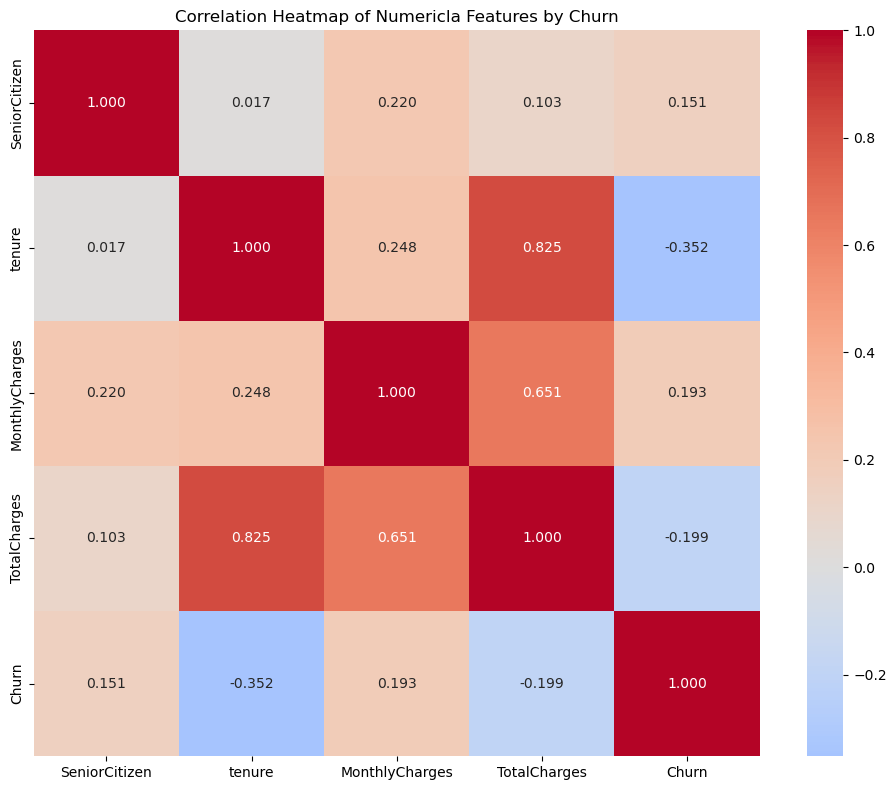

In [12]:
#Convert Churn to numerical values 
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

numerical_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

#correlation matrix
corr_mat = df[numerical_cols].corr()

display(corr_mat)

#heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', center=0, fmt=".3f", square=True)
plt.title('Correlation Heatmap of Numericla Features by Churn')
plt.tight_layout()
plt.show()


-----------------------------------------------------------------------------------------
- Boxplot - to check any outliers

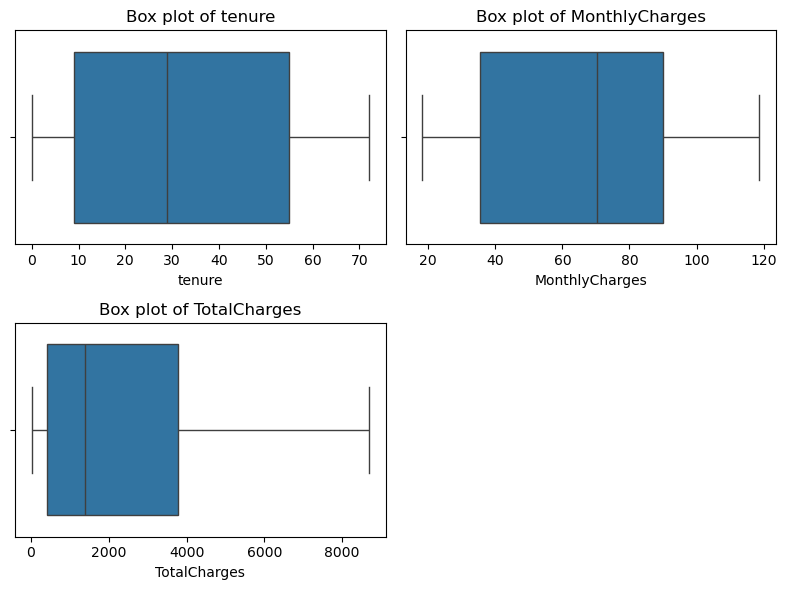

In [13]:
plt.figure(figsize=(8, 6))
for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()   #No visible outliers 

### Encoding categorical variables 

In [15]:
#replace the duplicates 
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

#Now we can apply the one hot encoding to all the features 
df = pd.get_dummies(data=df, dtype=int)

#shape after encoding
df.shape

print("Dtypes after get_dummies:")
print(df.dtypes.value_counts())

Dtypes after get_dummies:
int32      34
int64       3
float64     2
Name: count, dtype: int64


### Split 80-20 and Scale 

In [16]:
#Scale only 3 columns
scale_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])


X = df.drop(['Churn'], axis=1)
y = df['Churn']

print(f"X shape: {X.shape}")
print(f"features: {X.shape[1]}")

#Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X shape: (7043, 38)
features: 38


### Model Building & Training


- Model 1 - Neural Network  (ANN)

In [17]:
from tensorflow.keras import backend as K
K.clear_session()

#Build model
model_1 = models.Sequential([
    layers.Dense(X.shape[1], activation='relu', input_shape=(X.shape[1],)),
    layers.Dense(14, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                1482      
                                                                 
 dense_1 (Dense)             (None, 14)                546       
                                                                 
 dense_2 (Dense)             (None, 1)                 15        
                                                                 
Total params: 2043 (7.98 KB)
Trainable params: 2043 (7.98 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
#Training model 1 
#est = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_1 = model_1.fit(
    X_train, 
    y_train, 
    epochs=100, 
    batch_size=32,
    verbose=1
)

print("\nTraining completed for model 1 - ANN \n")

Epoch 1/100
177/177 [==============================] - 3s 1ms/step - loss: 0.4719 - accuracy: 0.7730
Epoch 2/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4242 - accuracy: 0.7991
Epoch 3/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4183 - accuracy: 0.8042
Epoch 4/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4138 - accuracy: 0.8037
Epoch 5/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4119 - accuracy: 0.8055
Epoch 6/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4106 - accuracy: 0.8071
Epoch 7/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4073 - accuracy: 0.8064
Epoch 8/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4055 - accuracy: 0.8095
Epoch 9/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4061 - accuracy: 0.8106
Epoch 10/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4041 - accura

### Evaluation

In [19]:
model_1.evaluate(X_test, y_test)


45/45 [==============================] - 0s 1ms/step - loss: 0.5164 - accuracy: 0.7736


[0.5163766145706177, 0.773598313331604]

In [36]:
#predictions on test data
pred_1 = model_1.predict(X_test)

#format it with 0.5 threshold and compare it with the y_test values we have 
y_pred = []

for p in pred_1:
    if p > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)


acc_1 = accuracy_score(y_test, y_pred)
prec_1 = precision_score(y_test, y_pred)
rec_1 = recall_score(y_test, y_pred)
f1_1 = f1_score(y_test, y_pred)
auc_1 = roc_auc_score(y_test, pred_1)


print(f"Model 1 - ANN result")
print(f"\nAccuracy: {acc_1:.4f}")
print(f"Precision: {prec_1:.4f}")
print(f"recall: {rec_1:.4f}")
print(f"F1-score: {f1_1:.4f}")
print(f"AUC: {auc_1:.4f}")

45/45 [==============================] - 0s 1ms/step
Model 1 - ANN result

Accuracy: 0.7736
Precision: 0.5682
recall: 0.6123
F1-score: 0.5894
AUC: 0.8006


----------------------------------------------------------------------------
### Model Building and Training 

- CNN Model

In [31]:
#Reshape the data for 1D CNN
X_train_cnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

print(f"Reshape for CNN: {X_train_cnn.shape}")

Reshape for CNN: (5634, 38, 1)


In [33]:
#Build model
model_2 = models.Sequential([
    layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Dropout(0.2),
    layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
    layers.GlobalMaxPooling1D(),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 36, 64)            256       
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 18, 64)            0         
 g1D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 18, 64)            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 16, 32)            6176      
                                                                 
 global_max_pooling1d_1 (Gl  (None, 32)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_5 (Dense)             (None, 16)               

In [34]:
#Training 
history_2 = model_2.fit(
    X_train_cnn,
    y_train,
    epochs=100,
    batch_size=32,
    verbose=1
)

print("Training completed for CNN")

Epoch 1/100
177/177 [==============================] - 2s 4ms/step - loss: 0.5845 - accuracy: 0.7318
Epoch 2/100
177/177 [==============================] - 1s 4ms/step - loss: 0.5613 - accuracy: 0.7346
Epoch 3/100
177/177 [==============================] - 1s 4ms/step - loss: 0.5139 - accuracy: 0.7375
Epoch 4/100
177/177 [==============================] - 1s 4ms/step - loss: 0.4922 - accuracy: 0.7575
Epoch 5/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4815 - accuracy: 0.7655
Epoch 6/100
177/177 [==============================] - 1s 4ms/step - loss: 0.4788 - accuracy: 0.7600
Epoch 7/100
177/177 [==============================] - 1s 4ms/step - loss: 0.4774 - accuracy: 0.7591
Epoch 8/100
177/177 [==============================] - 1s 4ms/step - loss: 0.4741 - accuracy: 0.7630
Epoch 9/100
177/177 [==============================] - 1s 4ms/step - loss: 0.4699 - accuracy: 0.7730
Epoch 10/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4699 - accura

### Evaluation

In [35]:
model_1.evaluate(X_test_cnn, y_test)

45/45 [==============================] - 0s 1ms/step - loss: 0.5164 - accuracy: 0.7736


[0.5163766145706177, 0.773598313331604]

In [37]:
#predictions on test data
pred_2 = model_2.predict(X_test_cnn)

#format it with 0.5 threshold and compare it with the y_test values we have 
y_pred_2 = []

for p in pred_2:
    if p > 0.5:
        y_pred_2.append(1)
    else:
        y_pred_2.append(0)


acc_2 = accuracy_score(y_test, y_pred_2)
prec_2 = precision_score(y_test, y_pred_2)
rec_2 = recall_score(y_test, y_pred_2)
f1_2 = f1_score(y_test, y_pred_2)
auc_2 = roc_auc_score(y_test, pred_2)


print(f"Model 1 - CNN result")
print(f"\nAccuracy: {acc_2:.4f}")
print(f"Precision: {prec_2:.4f}")
print(f"recall: {rec_2:.4f}")
print(f"F1-score: {f1_2:.4f}")
print(f"AUC: {auc_2:.4f}")

45/45 [==============================] - 0s 2ms/step
Model 1 - CNN result

Accuracy: 0.7991
Precision: 0.6553
recall: 0.5134
F1-score: 0.5757
AUC: 0.8317


### Comparison visualization 

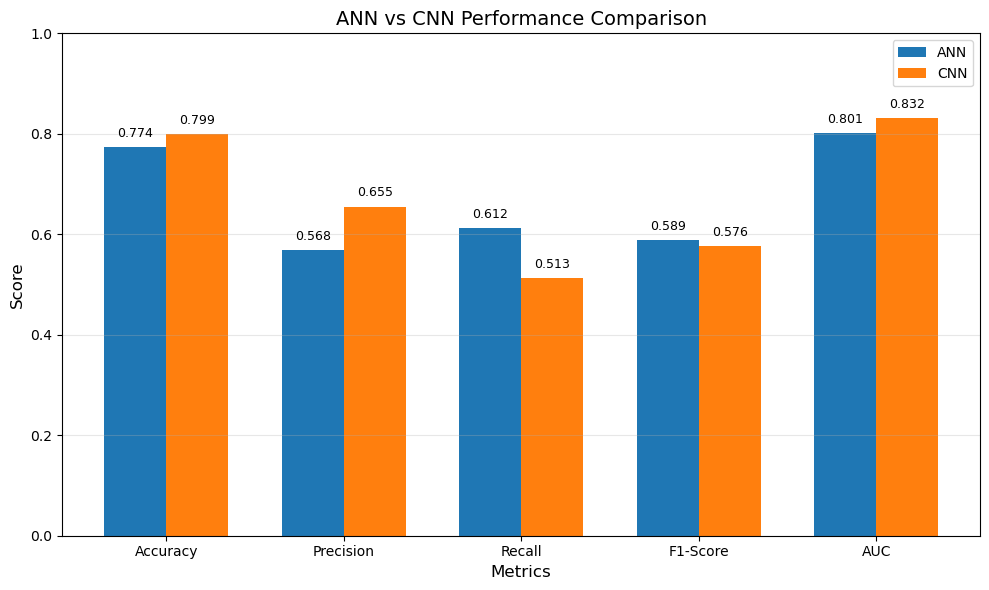

In [39]:
#Comparison dataset

comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'],
    'ANN': [acc_1, prec_1, rec_1, f1_1, auc_1],
    'CNN': [acc_2, prec_2, rec_2, f1_2, auc_2]
})


#visualization
plt.figure(figsize=(10, 6))
x = np.arange(len(comparison['Metric']))
width = 0.35

plt.bar(x - width/2, comparison['ANN'], width, label='ANN')
plt.bar(x + width/2, comparison['CNN'], width, label='CNN')
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('ANN vs CNN Performance Comparison', fontsize=14)
plt.xticks(x, comparison['Metric'])
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.ylim([0, 1])


for i, metric in enumerate(comparison['Metric']):
    plt.text(i - width/2, comparison['ANN'].iloc[i] + 0.02, 
             f"{comparison['ANN'].iloc[i]:.3f}", ha='center', fontsize=9)
    plt.text(i + width/2, comparison['CNN'].iloc[i] + 0.02, 
             f"{comparison['CNN'].iloc[i]:.3f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

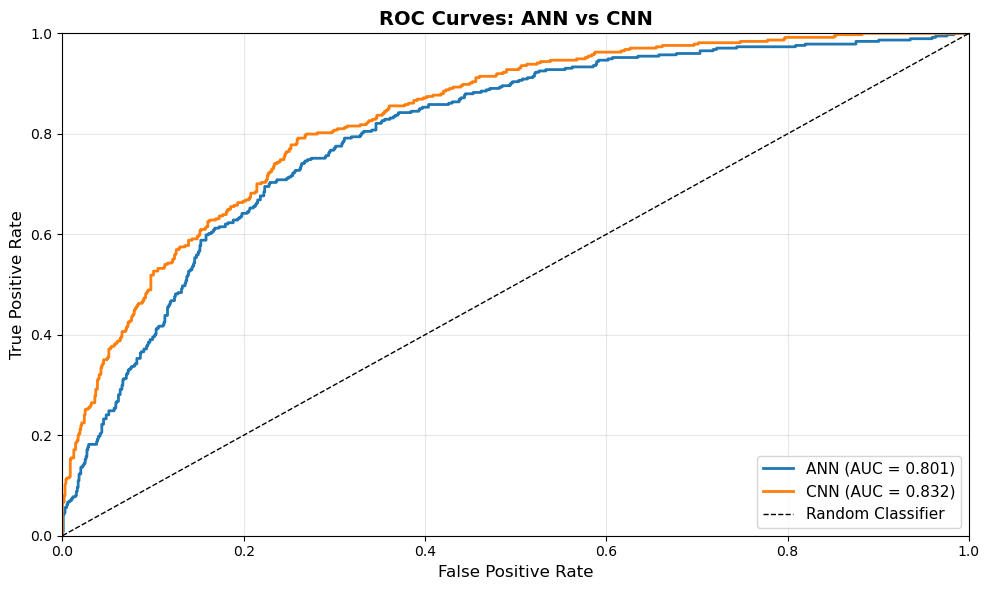

In [41]:
#ROC-AUC Curve

from sklearn.metrics import roc_curve

# Calculate ROC curves
fpr_1, tpr_1, _ = roc_curve(y_test, pred_1)
fpr_2, tpr_2, _ = roc_curve(y_test, pred_2)

#plot curve

plt.figure(figsize=(10, 6))
plt.plot(fpr_1, tpr_1, linewidth=2, label=f'ANN (AUC = {auc_1:.3f})')
plt.plot(fpr_2, tpr_2, linewidth=2, label=f'CNN (AUC = {auc_2:.3f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves: ANN vs CNN', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.tight_layout()
plt.show()